In [6]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from statistics import *

In [111]:
climatedata = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/subplots.csv')
print(climatedata.corr(method ='pearson'))
print(climatedata.corr(method ='spearman'))
print(climatedata.corr(method ='kendall'))


                         mauna loa co2  south pole co2  heat content  \
mauna loa co2                 1.000000        0.616522     -0.034962   
south pole co2                0.616522        1.000000     -0.021547   
heat content                 -0.034962       -0.021547      1.000000   
+2σ heat content             -0.132184       -0.087883      0.948018   
-2σ heat content              0.049149        0.035738      0.963747   
-2σ temperature anomaly      -0.109500       -0.073327      0.410295   
temperature anomaly          -0.198005       -0.133577      0.382951   
+2σ temperature anomaly      -0.255834       -0.172893      0.349207   

                         +2σ heat content  -2σ heat content  \
mauna loa co2                   -0.132184          0.049149   
south pole co2                  -0.087883          0.035738   
heat content                     0.948018          0.963747   
+2σ heat content                 1.000000          0.829313   
-2σ heat content                 0.8

## Importando dados

In [100]:
#Consumo de álcool nos países
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv')

print( df['alcohol'])
print( df['alcohol'].size)

df = data[0:10]

df

         alcohol
alcohol      1.0
0    17.5
1    16.8
2    15.4
3    15.1
4    14.4
5    13.9
6    13.8
7    13.3
8    13.0
9    13.0
Name: alcohol, dtype: float64
10


,location,alcohol
0,Belarus,17.5
1,Moldova,16.8
2,Lithuania,15.4
3,Russia,15.1
4,Romania,14.4
5,Ukraine,13.9
6,Andorra,13.8
7,Hungary,13.3
8,Czech Republic,13.0
9,Slovakia,13.0


In [42]:
df['alcohol'].value_counts(bins=10)

tot_classes=1+3.3*np.log( df['alcohol'].size)
print(tot_classes)

print(df['alcohol'].value_counts(bins=tot_classes))

amplitude=((df['alcohol'].max()-df['alcohol'].min())/tot_classes)
print(amplitude)

8.598530806880351
(12.995000000000001, 13.562]    3
(13.562, 14.125]                2
(16.938, 17.5]                  1
(16.375, 16.938]                1
(15.25, 15.812]                 1
(14.688, 15.25]                 1
(14.125, 14.688]                1
(15.812, 16.375]                0
Name: alcohol, dtype: int64
0.5233452203717408


## Amplitude
A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para isso, pode-se usar as funções `max()` e `min()`, que retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [13]:
amplitude = data['alcohol'].max() - data['alcohol'].min()
print('A amplitude do intervalo é: ', amplitude)

A amplitude do intervalo é:  17.4


## Histograma

histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes. [\[fonte\]](https://books.google.com.br/books?id=-FlCFbIluaQC&printsec=frontcover&hl=pt-BR#v=onepage&q&f=false)

In [53]:
import plotly.express as px

#passamos o dataframe e a coluna Alcohol como valores do eixo x
fig = px.histogram(data, x="alcohol", nbins=5)
fig.show()

# Média e variância

Duas das operações estatísticas mais básicas são a média µ e o desvio padrão σ de uma matriz de dados unidimensional, ou seja, uma sequência de valores numéricos. A média de um conjunto de números $ x_1, ..., x_N $ é definida como:

$ \mu = \sum_{i=1}^N x_i /n $

Variância é uma métrica que descreve a dispersão dos dados ou a que distância os valores estão da média.

$ s =  \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2 $


[\[fonte\]](https://plot.ly/python/v3/basic-statistics/)

In [78]:
media = np.mean(data['alcohol'])
print(media)
print(np.var(data['alcohol']))


6.208376963350786
17.062442915490255


# Desvio Padrão

O desvio padrão de um conjunto de dados é definido como a raiz da Variância:

$ s = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2} $


[\[fonte\]](https://plot.ly/python/v3/basic-statistics/)

In [77]:
media = np.mean(data['alcohol'])
st_dev = np.std(data['alcohol'])

print("A média é: ", media)
print("O desvio_padrão é:  ", st_dev)

A média é:  6.208376963350786
O desvio_padrão é:   4.1306710006354


## Mediana 

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6. Se houver um número par de observações, não há um único valor do meio. Então, a mediana é definida como a média dos dois valores do meio. No conjunto de dados {3, 5, 7, 9}, a mediana é:

$ {\displaystyle {\frac {5+7}{2}}=6}$. 

[\[fonte\]](http://mathworld.wolfram.com/StatisticalMedian.html)

In [10]:
intervalo = [1, 3, 3, 6, 7, 8, 9]
mediana_intervalo = np.median(intervalo)
print("A mediana do intervalo é:", mediana_intervalo)


mediana_dataset = np.median(data['alcohol'])
print("A mediana do dataset é: ", mediana_dataset)

A mediana do intervalo é: 6.0
A mediana do dataset é:  6.4


## Quantil

O quantil pode ser entendido como uma generalização da mediana. O quantil é o valor abaixo do qual está um certo percentual dos dados. No caso da mediana, esse percentual é de 50%. Vejamos o código para o quantil, que pode ser calculado através da função quantile(). Esta função, por padrão, adota o percentual (representado através do parâmetro q) de 50%, ou seja, é uma mediana por padrão. Você pode configurar outros percentuais através deste mesmo parâmetro:

In [79]:
# Equivalente ao primeiro quartil
# Ou seja: divede a distribuição em 25% abaixo e 75% acima
primeiro_quartil = data['alcohol'].quantile(q = 0.25)

# Equivalente ao quarto decil
# Ou seja: divide a distribuição em 40% abaixo e 60% acima
quarto_decil = data['alcohol'].quantile(q = 0.4)

print("O valor referente ao  primeiro quartil é: ", primeiro_quartil)
print("O valor referente ao  quarto decil é: ", quarto_decil)

O valor referente ao  primeiro quartil é:  2.6
O valor referente ao  quarto decil é:  4.6


{'whiskers': [<matplotlib.lines.Line2D at 0x7f55440bbd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55440d6850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55440bb150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55440bbc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55452af7d0>],
 'means': []}

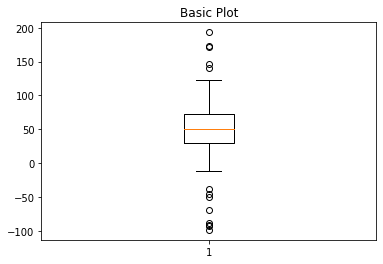

In [97]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f553e864c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f553e864150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f553e883190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f553e871990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f553e871e90>],
 'means': []}

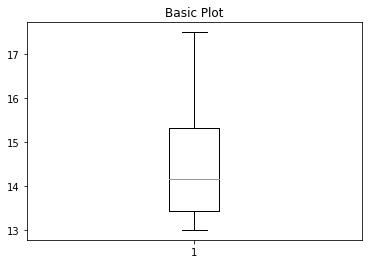

In [96]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['alcohol'])

## Moda

Em estatística, moda é uma das medidas de altura de um conjunto de dados, assim como a média e a mediana. Ela pode ser definida em moda amostral e populacional.

Em relação à primeira delas, a moda amostral de um conjunto de dados trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados. Moda é especialmente útil quando os valores ou as observações não são numéricos, casos em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra \[maçã, banana, laranja, laranja, laranja, pêssego\] é laranja. Moda amostral não é necessariamente única como média ou mediana. Amostras que possuem uma moda são chamadas unimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 7\] tem moda 5. Amostras que possuem duas modas são chamadas bimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6\] tem modas 5 e 6. Amostras que possuem várias modas são chamadas multimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6, 7, 7\] tem modas 5, 6 e 7. Amostras que não possuem moda são chamadas amodais. Por exemplo, a amostra \[1, 3, 2, 5, 7, 6\] não tem moda.
[\[fonte\]](http://www.pucrs.br/edipucrs/erematsul/minicursos/modaestatistica.pdf)


In [12]:
intervalo = [1, 2, 3, 5, 5, 6, 7]
moda = mode(intervalo)

print('A moda do intervalo é: ', moda)

A moda do intervalo é:  5


## Gráfico de dispersão

Os diagramas de dispersão ou gráficos de dispersão são representações de dados de duas (tipicamente) ou mais variáveis que são organizadas em um gráfico. O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados. Os dados são exibidos como uma coleção de pontos, cada um com o valor de uma variável determinando a posição no eixo horizontal e o valor da outra variável determinando a posição no eixo vertical (em caso de duas variáveis).[\[fonte\]](https://www.itl.nist.gov/div898/handbook/eda/section3/scatterp.htm)

In [15]:
#test = data.sample(frac=1)


fig = px.scatter(data, x='alcohol')

fig.show()


In [117]:
print(climatedata.describe())
print(climatedata.corr())

fig = px.scatter(data, x='heat content')
fig.show()

       mauna loa co2  south pole co2  heat content  +2σ heat content  \
count     685.000000      685.000000    685.000000        685.000000   
mean      350.457241      346.503650      0.040277          0.137151   
std        25.000696       33.045861      1.460931          1.396604   
min       312.660000        0.000000     -9.538462         -6.666667   
25%       327.660000      325.910000      0.000000          0.000000   
50%       348.050000      345.160000      0.000000          0.000000   
75%       370.520000      367.190000      0.000000          0.000000   
max       401.770000      395.270000     13.333333         13.641026   

       -2σ heat content  -2σ temperature anomaly  temperature anomaly  \
count        685.000000               685.000000           685.000000   
mean          -0.055999                 0.005195             0.010549   
std            1.657029                 0.061005             0.070440   
min          -12.410256                -0.302609           

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['storenum', 'OPENDATE', 'date_super', 'conversion', 'st', 'county', 'STREETADDR', 'STRCITY', 'STRSTATE', 'ZIPCODE', 'type_store', 'LAT', 'LON', 'MONTH', 'DAY', 'YEAR'] but received: heat content

## Distribuição normal

A distribuição Normal é uma das mais importantes distribuições de probabilidade pois muitos fenômenos aleatórios comportam-se próximos a essa distribuição:
* altura;
* pressão sangüínea;
* Peso

Pode ser utilizada para calcular, de forma aproximada, probabilidades para outras distribuições, como por exemplo, para a distribuição binomial [\[fonte\]](https://www.ime.usp.br/~hbolfar/aula_2013/Aula6-A12012.pdf)

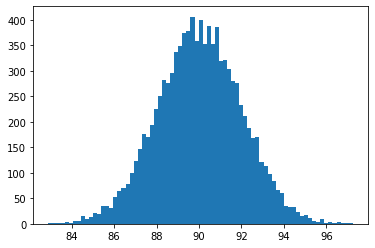

In [25]:
import matplotlib.pyplot as plt

values= np.random.normal(90,2, 10000)
plt.hist(values,75)
plt.show()
